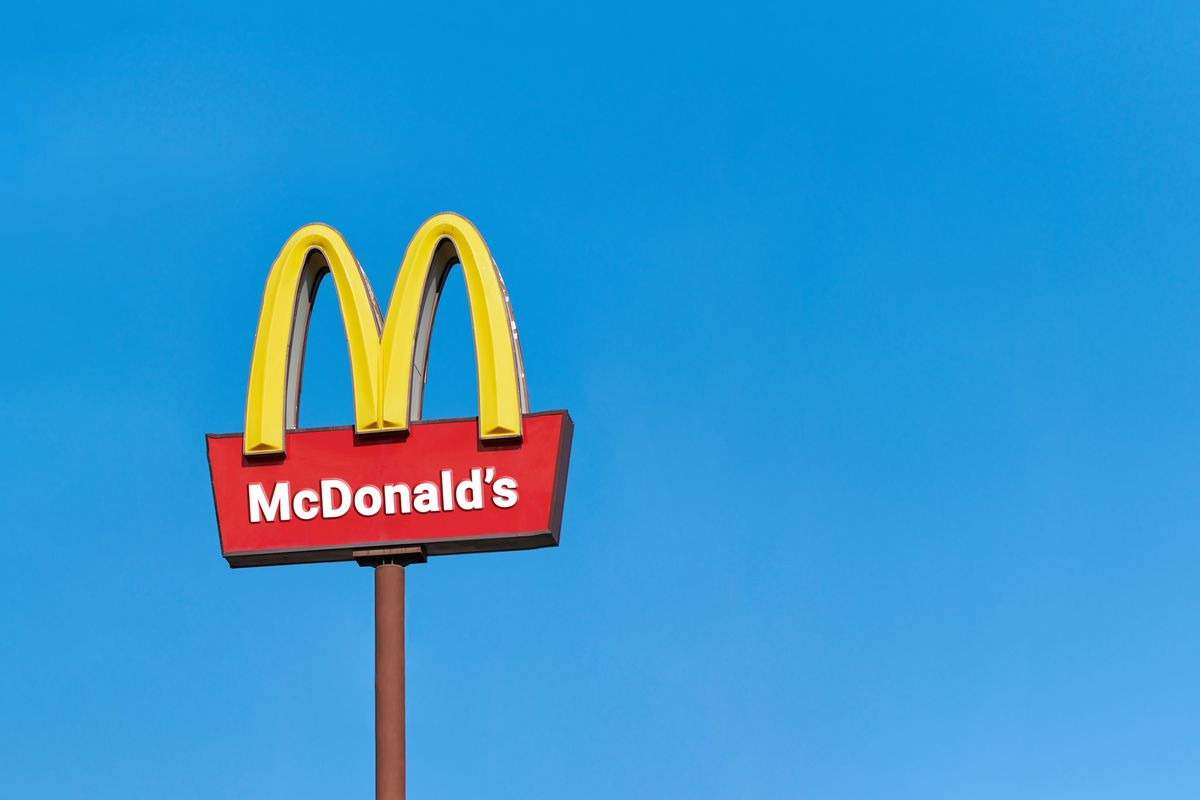

**Hello There. I am patrick. The Following Dataset is a Dataset of McDonald´s. In this Dataset it reflects the reviews of different McDonalds in different cities of USA. So, Here I am going to perform some Data analysing, Data cleaning, Pre-processing, text mining, Data training, Data visualisation and at last I will create a model and fit the data in the model and predict the accuracy of it. Here I am doing this project with the help of NATURAL LANGUAGE AND TEXT PROCESSING (NLTK).**

# **Lets Start**

* At first importing some Basic Python libraries and uploading the collected data as a .csv file at Google Colab.

In [1]:
import pandas as pd
import numpy as np
from google.colab import files

In [2]:
uplod=files.upload()

Saving McDonalds-Sentiment.csv to McDonalds-Sentiment.csv


In [3]:
import io 
data=pd.read_csv(io.BytesIO(uplod['McDonalds-Sentiment.csv']),sep=",", encoding = "ISO-8859-1")
data.head()

,_unit_id,_golden,_unit_state,_trusted_judgments,_last_judgment_at,policies_violated,policies_violated:confidence,city,policies_violated_gold,review
0,679455653,False,finalized,3,2/21/15 0:36,RudeService\rOrderProblem\rFilthy,1.0\r0.6667\r0.6667,Atlanta,NaN,"I'm not a huge mcds lover, but I've been to be..."
1,679455654,False,finalized,3,2/21/15 0:27,RudeService,1,Atlanta,NaN,Terrible customer service. Î¾I came in at 9:30...
2,679455655,False,finalized,3,2/21/15 0:26,SlowService\rOrderProblem,1.0\r1.0,Atlanta,NaN,"First they ""lost"" my order, actually they gave..."
3,679455656,False,finalized,3,2/21/15 0:27,na,0.6667,Atlanta,NaN,I see I'm not the only one giving 1 star. Only...
4,679455657,False,finalized,3,2/21/15 0:27,RudeService,1,Atlanta,NaN,"Well, it's McDonald's, so you know what the fo..."


* So, In this Dataset we can see we have some several features like *review*, *city*, *policies_violated* etc. So, In this case we can identify that policies_violated column will be our output column.This policies_violated column is basically the output of all the reviews which are violating in which policies reflects in this column.Here we can easily understand by seeing the dataset our independent feature will be our review column and dependent feature will be our polities_violated column.

* So, As far as we know that policies_violated column will be our dependent variable. So, at first I need to be checked how many unique values are there in the column.


In [4]:
print(data['policies_violated'].unique())

['RudeService\rOrderProblem\rFilthy' 'RudeService'
 'SlowService\rOrderProblem' 'na' 'BadFood\rSlowService'
 'SlowService\rScaryMcDs' 'SlowService\rRudeService\rMissingFood'
 'SlowService' 'BadFood\rRudeService\rSlowService'
 'SlowService\rMissingFood\rBadFood' 'BadFood' 'ScaryMcDs'
 'RudeService\rOrderProblem' 'OrderProblem' 'RudeService\rBadFood'
 'Filthy\rBadFood' 'SlowService\rRudeService' 'SlowService\rBadFood'
 'RudeService\rOrderProblem\rBadFood\rFilthy'
 'RudeService\rOrderProblem\rBadFood' 'MissingFood' nan
 'RudeService\rBadFood\rFilthy\rSlowService' 'SlowService\rCost'
 'Cost\rMissingFood'
 'Filthy\rna\rSlowService\rScaryMcDs\rRudeService\rOrderProblem\rMissingFood\rCost\rBadFood'
 'OrderProblem\rRudeService' 'Filthy' 'OrderProblem\rSlowService'
 'RudeService\rFilthy' 'OrderProblem\rBadFood' 'Filthy\rRudeService'
 'RudeService\rOrderProblem\rSlowService'
 'SlowService\rOrderProblem\rRudeService' 'BadFood\rRudeService'
 'RudeService\rScaryMcDs' 'Filthy\rRudeService\rOrderProb

* As we seen some reviews are violating multiple policies of the company such that the unique key is quite scatterd and we can not see how many values are uniquely presented in the column. And we can see it has connected with '\\'. So thats why I used a split method to split the values and stored into a new column.For this each of the data is also divided among with spliting. so now it has become more easier to understand for us and also for our ML-model


In [5]:
df=data.drop('policies_violated', axis=1).join(data['policies_violated'].str.split('\r', expand=True).stack().reset_index(level=1, drop=True).rename('policies_violated'))

In [6]:
df.head()

,_unit_id,_golden,_unit_state,_trusted_judgments,_last_judgment_at,policies_violated:confidence,city,policies_violated_gold,review,policies_violated
0,679455653,False,finalized,3,2/21/15 0:36,1.0\r0.6667\r0.6667,Atlanta,NaN,"I'm not a huge mcds lover, but I've been to be...",RudeService
0,679455653,False,finalized,3,2/21/15 0:36,1.0\r0.6667\r0.6667,Atlanta,NaN,"I'm not a huge mcds lover, but I've been to be...",OrderProblem
0,679455653,False,finalized,3,2/21/15 0:36,1.0\r0.6667\r0.6667,Atlanta,NaN,"I'm not a huge mcds lover, but I've been to be...",Filthy
1,679455654,False,finalized,3,2/21/15 0:27,1,Atlanta,NaN,Terrible customer service. Î¾I came in at 9:30...,RudeService
2,679455655,False,finalized,3,2/21/15 0:26,1.0\r1.0,Atlanta,NaN,"First they ""lost"" my order, actually they gave...",SlowService


* After spliting we can see there are only 9 unique values are presneted and we can also see how many times a value presented in the dataset and also the percentage of it.

In [7]:
df['policies_violated'].value_counts()

RudeService     503
SlowService     363
OrderProblem    336
na              308
BadFood         261
ScaryMcDs       135
Filthy          130
Cost             54
MissingFood      54
Name: policies_violated, dtype: int64

In [8]:
df['policies_violated'].value_counts(normalize=True) * 100

RudeService     23.460821
SlowService     16.930970
OrderProblem    15.671642
na              14.365672
BadFood         12.173507
ScaryMcDs        6.296642
Filthy           6.063433
Cost             2.518657
MissingFood      2.518657
Name: policies_violated, dtype: float64

* Then I checked the null values that I can handle the missing values for our model.


In [9]:
df.isnull().sum()

_unit_id                           0
_golden                            0
_unit_state                        0
_trusted_judgments                 0
_last_judgment_at                  0
policies_violated:confidence      54
city                             118
policies_violated_gold          2198
review                             0
policies_violated                 54
dtype: int64

* Droping Those columns which are not important for our NLP analysis and also dropping such values like 'na'=not assigned values from our Policies_violated Column.


In [10]:
df.drop(['_unit_id','_golden','_unit_state','_trusted_judgments','_last_judgment_at','policies_violated:confidence','policies_violated_gold'],axis=1,inplace=True)

In [11]:
df.head()

,city,review,policies_violated
0,Atlanta,"I'm not a huge mcds lover, but I've been to be...",RudeService
0,Atlanta,"I'm not a huge mcds lover, but I've been to be...",OrderProblem
0,Atlanta,"I'm not a huge mcds lover, but I've been to be...",Filthy
1,Atlanta,Terrible customer service. Î¾I came in at 9:30...,RudeService
2,Atlanta,"First they ""lost"" my order, actually they gave...",SlowService


In [12]:
df=df.dropna()

In [13]:
df.drop(df.index[df['policies_violated'] == 'na'], inplace = True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [14]:
df['policies_violated'].value_counts()

RudeService     467
SlowService     333
OrderProblem    311
BadFood         245
ScaryMcDs       120
Filthy          118
Cost             47
MissingFood      46
Name: policies_violated, dtype: int64

* After Dropping I just took a copy of our dataset and set the new index for our data cause after a lot of dropping and removing columns our dataset is not properly sorted. so thats why for sorting and making it a sequence for our model. Then, I used a pythons matplotlib library for some visualzation for better understanding.


In [15]:
rev=df.copy()

In [16]:
rev.reset_index(inplace=True)

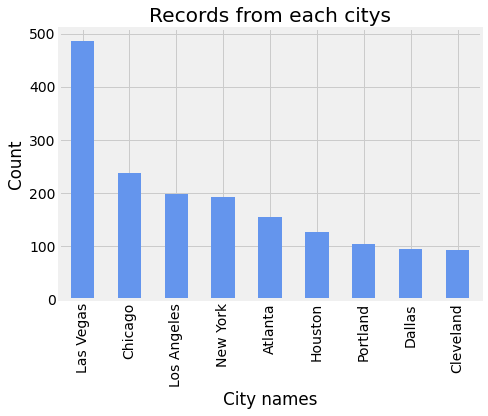

In [17]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(7,6))
plt.style.use('fivethirtyeight')
plt.title('Records from each citys')
df['city'].value_counts().plot(kind='bar',color='cornflowerblue')
plt.xlabel('City names')
plt.ylabel('Count')
plt.tight_layout()

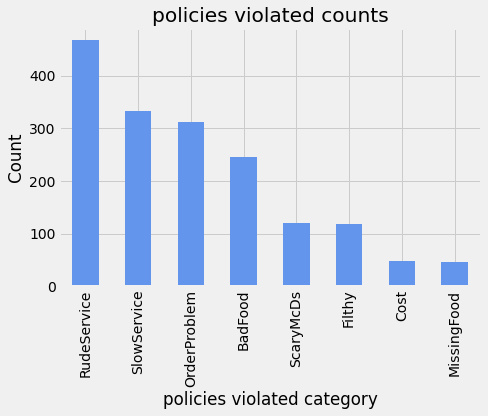

In [18]:
plt.figure(figsize=(7,6))
plt.style.use('fivethirtyeight')
plt.title('policies violated counts')
df['policies_violated'].value_counts().plot(kind='bar',color='cornflowerblue')
plt.xlabel('policies violated category')
plt.ylabel('Count')
plt.tight_layout()

In [19]:
df.drop('city',axis=1, inplace=True)

* Then We performed some text mining features which is already build in at NLTK library such as stopwords, stemming. By which we can make our data short and which will be easier for our machine to catch and understand. So, This case I removed the punctuations, made the captial letter into small letter than removed unnecessary words from our review column, after that we stemmed the data and added into the corpus matrix.

In [20]:
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
import re
import nltk
nltk.download('stopwords')
ps = PorterStemmer()
corpus = []
for i in range(0, len(rev)):
    review = re.sub('[^a-zA-Z]', ' ', rev['review'][i])
    review = review.lower()
    review = review.split()
    
    review = [ps.stem(word) for word in review if not word in stopwords.words('english')]
    review = ' '.join(review)
    corpus.append(review)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


* Form the code which has shown in below we can see. The actual differences we made through our previous code. the corpus is showing us now a much lesser than our df df['review']. so we selected a random value from the matrix and selected the same value from our dataset to see the difference between them.

In [21]:
corpus[27]

'slow slow slow go flight catch life live hungri wait get airport particular mcdonald worth time'

In [22]:
df['review'].values[27]

"SLOW-SLOW-SLOW! Î¾Don't go here if you have a flight to catch...or a life to live!!!!! Î¾If you're hungry, wait until you get to the airport. Î¾This particular McDonald's is just not worth your time."

* In the next line of code I just made a category for my ML model among our targeted values. and used map function to map the values into integer. cause it will be very easy to understand for our ML model when it comes to binary.

In [23]:
y=rev['policies_violated'].map({'RudeService':0, 'BadFood':0, 'Filthy':0, 'SlowService':0, 'OrderProblem':1, 'Cost':1, 'ScaryMcDs':1,'MissingFood':1})

* Now I import a vectorizer from sklearn and set the parameters. which will set term frequency–inverse document frequency for our words. which will help our model to train. and by which we can find those words which are the most valuable through our Corpus matrix. thann we can train our dataset for our ML- model.

In [24]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_v=TfidfVectorizer(max_features=505,ngram_range=(1,4))
X=tfidf_v.fit_transform(corpus).toarray()

In [25]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=0)

In [26]:
count_df = pd.DataFrame(X_train, columns=tfidf_v.get_feature_names())


* This count_df will show us the dataset why we actually used TF-IDF vectorizer.It will show us the words as feature.Which are most important in our corpus or we can say which are the most important and valuable words in our reviews. 

In [27]:
count_df.head()


,absolut,across,act,actual,add,ago,ahead,almost,alreadi,also,alway,annoy,anoth,anyth,anyway,apolog,appl,area,around,ask,attent,attitud,avoid,aw,away,back,bacon,bad,bag,bathroom,beg,behind,believ,best,better,big,big mac,biscuit,bit,bite,...,us,use,usual,visit,wait,wait minut,walk,want,warm,watch,water,way,week,well,went,went drive,whole,wife,window,wish,within,without,woman,word,work,worker,world,wors,worst,worst mcdonald,worst mcdonald ever,would,wrap,write,wrong,wrong order,wtf,ye,year,yet
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.103135,0.091148,0.074947,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.105969,0.125238,0.0,0.0,0.0,...,0.105068,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.00000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.00000
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.198637,0.0,0.0,0.0,0.170145,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.116139,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.133635,0.000000,0.0,0.0,0.128975,0.164942,0.0,0.00000,0.0,0.0,0.139884,0.000000,0.0,0.0,0.0,0.00000
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.100531,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.177182,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.104865,0.000000,0.0,0.20689,0.0,0.0,0.227470,0.374412,0.0,0.0,0.0,0.17645
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.236972,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.183026,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.237334,0.0,0.0,0.0,0.0,0.0,0.000000,0.291283,0.0,0.0,0.000000,0.000000,0.0,0.00000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.00000
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.201219,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.00000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.00000


* Then We import our model Multinomial Naive Bayes from sklearn.naive_bayes and set the parameter alpha as a 0.3 and pass the trained dataset and predict the socre from our test dataset.

In [28]:
from sklearn.naive_bayes import MultinomialNB
model=MultinomialNB(alpha=0.3)

In [29]:
from sklearn import metrics
model.fit(X_train, y_train)
pred = model.predict(X_test)
score = metrics.accuracy_score(y_test, pred)
score

0.703770197486535

* And here I used a Hyper-parameter tuning technique to see that which alpha value will give us the best result accoridng to our preprocesed data.

In [30]:
previous_score=0
for alpha in np.arange(0,1,0.1):
    sub_classifier=MultinomialNB(alpha=alpha)
    sub_classifier.fit(X_train,y_train)
    y_pred=sub_classifier.predict(X_test)
    score = metrics.accuracy_score(y_test, y_pred)
    if score>previous_score:
        classifier=sub_classifier
    print("Alpha: {}, Score : {}".format(alpha,score))

Alpha: 0.0, Score : 0.7001795332136446
Alpha: 0.1, Score : 0.703770197486535
Alpha: 0.2, Score : 0.7055655296229802
Alpha: 0.30000000000000004, Score : 0.703770197486535
Alpha: 0.4, Score : 0.703770197486535
Alpha: 0.5, Score : 0.7055655296229802
Alpha: 0.6000000000000001, Score : 0.7055655296229802
Alpha: 0.7000000000000001, Score : 0.703770197486535
Alpha: 0.8, Score : 0.6983842010771992
Alpha: 0.9, Score : 0.6947935368043088


/usr/local/lib/python3.7/dist-packages/sklearn/naive_bayes.py:507: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  'setting alpha = %.1e' % _ALPHA_MIN)


So, As we can see our model is doing better and alsoby hyper parameter tuning we can see that which alpha value will give us a better prediction result. So in this case if we set Alpha value as 0.2,0.5,0.6- our model will give us a slightly better socre.

 **That's actually all for this project. Hope you will like it.**
# **Thank you. 🎈**